In [36]:
import geopandas
import pandas as pd
import glob
import datetime as dt
import re

In [56]:
def read_data(type, city = None):
    csvfiles = glob.glob(f"data{'/'+city if city else ''}/data-{type}-*.geojson")

    dfs = []

    for file in csvfiles:
        df = geopandas.read_file(file)

        # Find the timestamp in the filename.
        df["timestamp"] = re.search("[0-9]{4}\-[0-9]{2}\-[0-9]{2}\_[0-9]{4}", file)[0]

        # Format the timestring so it can be converted to a timestamp.
        df["timestamp"] = df["timestamp"].apply(lambda x: x[:-2] + ':' + x[-2:])
        df["timestamp"] = df["timestamp"].str.replace("_", " ")

        # Convert to timestamp, then from UTC to EST (minus 4 hours).
        df["timestamp"] = pd.to_datetime(df["timestamp"]) - dt.timedelta(hours = 4)
        
        dfs.append(df)
        
    data = pd.concat(dfs)

    return data

## Shapes

In [57]:
shapes = read_data("shapes")

shapes

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,8.417532e+05,11061.622130,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
1,2899719,dd9d67f1-6333-497c-8ec4-77291f037d25,1,LAV-I-18195-1,7.826897e+05,10868.220674,"POLYGON ((-76.57129 45.54161, -76.57156 45.541...",2023-04-06 10:59:00
2,2899720,e7597d45-0678-44e8-a7ba-7a6ca514a342,1,LAV-I-18195-1,1.171973e+05,1353.738910,"POLYGON ((-76.66318 45.57150, -76.66401 45.572...",2023-04-06 10:59:00
3,2899721,5ce36fc5-405d-47c1-86e3-0a95478ac17f,1,LAV-I-18195-1,3.001864e+04,621.359927,"POLYGON ((-76.65784 45.60850, -76.65775 45.608...",2023-04-06 10:59:00
4,2899722,5e0a58a7-7948-4bc6-92f0-75593a203f9c,1,LAV-I-18195-1,2.998392e+04,621.000436,"POLYGON ((-76.65167 45.57708, -76.65159 45.577...",2023-04-06 10:59:00
...,...,...,...,...,...,...,...,...
3995,2923968,38cd75f5-69c2-434c-ad31-e1b9ff2f6db4,1,NOR-I-15918-1,1.058007e+06,16137.055786,"POLYGON ((-73.65976 45.56814, -73.65976 45.567...",2023-04-06 11:55:00
3996,2924016,4a7a374d-00b7-4dcc-b6f1-336f3b07f2f1,0,LAV-I-20500-1,3.008174e+04,622.012668,"POLYGON ((-74.38566 45.66547, -74.38557 45.665...",2023-04-06 11:55:00
3997,2924017,4f1d3107-e63a-4e33-94ed-726e4157872c,0,LAV-I-20500-1,3.008257e+04,622.021196,"POLYGON ((-74.38150 45.66622, -74.38140 45.666...",2023-04-06 11:55:00
3998,2924018,4e5b6c02-16b2-4448-a55f-6a74cff94304,1,SEI-I-26317-1,3.050062e+04,626.328411,"POLYGON ((-72.65374 46.03880, -72.65388 46.039...",2023-04-06 11:55:00


In [58]:
shapes[shapes['OBJECTID'] == 2899718]

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:25:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:35:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:45:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:55:00


In [59]:
shapes.pivot(index="OBJECTID", columns="timestamp", values="Shape__Area")

timestamp,2023-04-06 10:59:00,2023-04-06 11:25:00,2023-04-06 11:35:00,2023-04-06 11:45:00,2023-04-06 11:55:00
OBJECTID,,,,,
2899718,841753.187500,841753.187500,841753.187500,841753.187500,8.417532e+05
2899719,782689.738281,782689.738281,782689.738281,782689.738281,7.826897e+05
2899720,117197.269531,117197.269531,117197.269531,117197.269531,1.171973e+05
2899721,30018.644531,30018.644531,30018.644531,30018.644531,3.001864e+04
2899722,29983.917969,29983.917969,29983.917969,29983.917969,2.998392e+04
...,...,...,...,...,...
2923968,NaN,NaN,NaN,NaN,1.058007e+06
2924016,NaN,NaN,NaN,NaN,3.008174e+04
2924017,NaN,NaN,NaN,NaN,3.008257e+04


## Points

In [60]:
points = read_data("points")

points

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry,timestamp
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 10:59:00
1,497657,8f9c9311-698c-40fb-8c79-80cb9761b7a5,LAV-I-18195-1,1,POINT (-76.57370 45.57492),2023-04-06 10:59:00
2,497658,00225fe0-aab7-48ae-a438-6e8e7b46924f,LAV-I-18157-1,1,POINT (-75.48215 45.57836),2023-04-06 10:59:00
3,497665,0834d766-4b2c-47fa-9008-c283ac59d0eb,LAV-I-18089-1,1,POINT (-75.45042 45.55672),2023-04-06 10:59:00
4,497667,44b8383c-04e6-4555-a4f1-28dd760120ce,LAV-I-18429-1,1,POINT (-74.72894 45.71589),2023-04-06 10:59:00
...,...,...,...,...,...,...
3040,508090,0ad32c32-a7d1-4714-af6b-9b0a38527828,LAV-I-22713-1,1,POINT (-73.48317 45.74153),2023-04-06 11:55:00
3041,508091,2792b2cd-e434-4a9e-92d5-19f4fd6224c1,LAV-I-22715-1,1,POINT (-76.93903 45.85040),2023-04-06 11:55:00
3042,508092,8124673b-b244-4541-af79-9d5616cc14e2,LAV-I-22714-1,1,POINT (-73.44351 45.78638),2023-04-06 11:55:00
3043,508093,05446505-d940-42d0-86ea-442b62fc78ab,LAV-I-22716-1,1,POINT (-76.95017 45.80974),2023-04-06 11:55:00


In [61]:
points.pivot_table(index="timestamp", columns="panneMajeure", values="OBJECTID", aggfunc="count")

panneMajeure,0,1
timestamp,,
2023-04-06 10:59:00,278,2680
2023-04-06 11:25:00,270,2714
2023-04-06 11:35:00,274,2731
2023-04-06 11:45:00,285,2739
2023-04-06 11:55:00,279,2766


<AxesSubplot:>

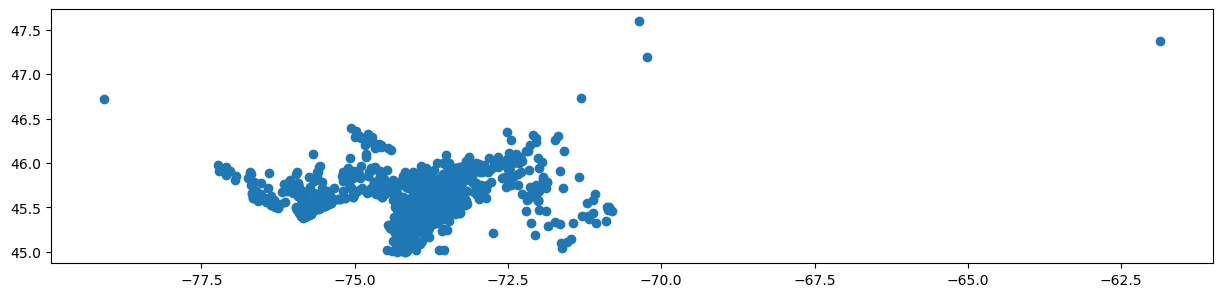

In [48]:
points.loc[points["timestamp"] == points["timestamp"].max(), :].plot(figsize=(15,15))

## Ottawa

In [62]:
ottaraw = read_data("shapes", "ottawa")

ottaraw.head(3)

ValueError: No objects to concatenate

In [53]:
ottaraw.loc[ottaraw["timestamp"] == ottaraw["timestamp"].max(), :].plot()

KeyError: 'timestamp'